In [1]:
# PREDICTING STUDENT PERFORMANCE


heu


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('C:/Users/DELL/Downloads/archive2/data.csv')
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Socioeconomic Score,1388.0,0.552274,0.261272,0.10128,0.322118,0.545945,0.78961,0.99982
Study Hours,1388.0,4.560807,1.897581,0.80000,3.475000,3.900000,5.90000,10.00000
Sleep Hours,1388.0,8.047262,1.370700,4.80000,7.000000,8.400000,9.10000,10.00000
Attendance (%),1388.0,58.536023,11.675287,40.00000,49.000000,57.000000,66.00000,100.00000
Grades,1388.0,40.691643,9.467358,32.00000,34.000000,35.000000,47.00000,91.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [8]:
df.shape

(1388, 5)

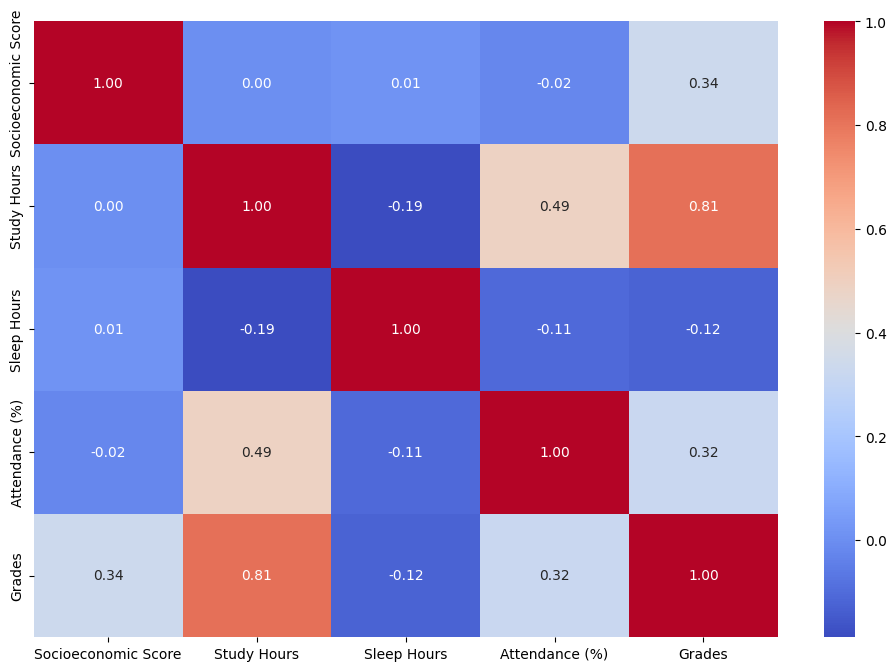

In [10]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [13]:
## using Linear Regression model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x = df[['Socioeconomic Score','Study Hours','Sleep Hours','Attendance (%)',]]
y = df['Grades']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)
x_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_const).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 Grades   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     978.1
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:25:44   Log-Likelihood:                -3250.4
No. Observations:                1110   AIC:                             6511.
Df Residuals:                    1105   BIC:                             6536.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.9366    

In [ ]:
#Hypothesis
#H0 - model is not significant
#h1 - model is significant

# Since our p-value in less than .05, we regect h0, thus there is enough evidence to support the claim that our model is significant
# overall, from R2, 78% of of the variation in the predicted variable is explained by our predictors
# Our model still needs improvements
